In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# **Step 2: Data Loading and Preprocessing**
<br>Import Libraries: Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset: Load the dataset from your Google Drive.

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Data Cleaning and Exploration:
Handle Missing Values: Explore missing values in relevant columns and decide on an appropriate strategy (e.g., imputation or removal).

In [ ]:
df.isnull().sum()
# Example: Imputing missing 'todate' with the median for each 'prodname' group
df['todate'] = df.groupby('prodname')['todate'].transform(lambda x: x.fillna(x.median()))

Convert Data Types: Ensure that date columns are in datetime format.

In [ ]:
df['MIN_ACT_DATE_DEP'] = pd.to_datetime(df['MIN_ACT_DATE_DEP'])
df['todate'] = pd.to_datetime(df['todate'])

**Exploratory Data Analysis (EDA): **
<br>Visualize data distributions and relationships to understand patterns in demurrage.

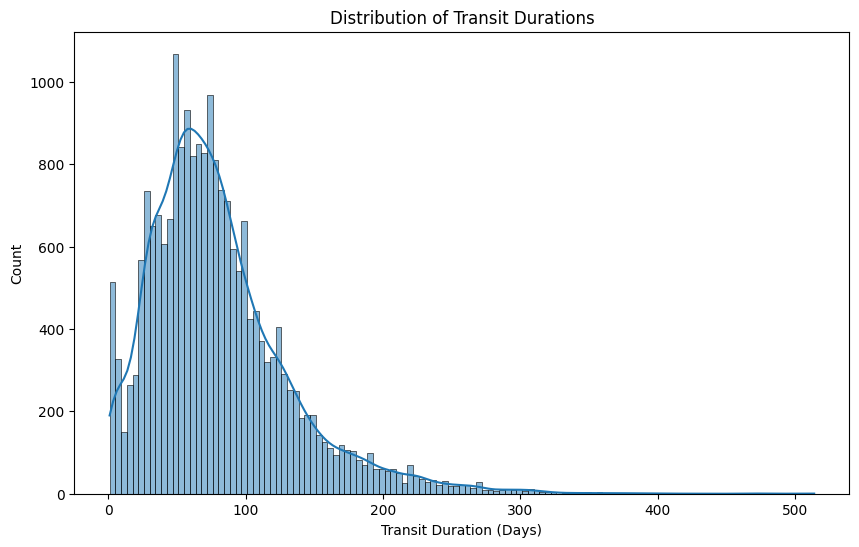

In [ ]:
# Example: Histogram of transit durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Transit duration days'], kde=True)
plt.title('Distribution of Transit Durations')
plt.xlabel('Transit Duration (Days)')
plt.show()

## Checking Date Range

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Convert date columns to datetime objects
df['MIN_ACT_DATE_DEP'] = pd.to_datetime(df['MIN_ACT_DATE_DEP'])
df['todate'] = pd.to_datetime(df['todate'])

# Find the oldest and latest dates
oldest_date = df[['MIN_ACT_DATE_DEP', 'todate']].min().min()
latest_date = df[['MIN_ACT_DATE_DEP', 'todate']].max().max()

# Print the date range
print(f"The date range of the data is from {oldest_date.strftime('%Y-%m-%d')} to {latest_date.strftime('%Y-%m-%d')}.")

The date range of the data is from 2021-02-01 to 2022-12-31.


Counting total job records

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Count distinct 'ordno' (Job number series)
distinct_ordno_count = df['ordno'].nunique()
print(f"Number of distinct 'ordno' (Job number series): {distinct_ordno_count}")

# Count distinct 'unitkey' (Container ID)
distinct_unitkey_count = df['unitkey'].nunique()
print(f"Number of distinct 'unitkey' (Container ID): {distinct_unitkey_count}")

Number of distinct 'ordno' (Job number series): 21327
Number of distinct 'unitkey' (Container ID): 7091


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Count distinct rows (unique combinations of all columns)
distinct_rows_count = len(df.drop_duplicates())

print(f"Number of distinct rows (unique records): {distinct_rows_count}")

Number of distinct rows (unique records): 21342


In [ ]:
duplicate_ordnos = df[df.duplicated(subset=['ordno'], keep=False)]['ordno'].unique()
print(f"Potentially duplicate 'ordno' values: {duplicate_ordnos}")

Potentially duplicate 'ordno' values: [400994 401305 401306 401981 401983 415587 415588 416595 416596 416598
 416599 436908 441834 443666 446094]


In [ ]:
for ordno in duplicate_ordnos:
  print(f"\nRecords for ordno = {ordno}:")
  print(df[df['ordno'] == ordno])


Records for ordno = 400994:
       ordno      unitkey  compcode       name      odate OrdStatus  \
4175  400994  TCLU2584766  SUTTONDE  BASF CORP 2021-03-17  Complete   
4176  400994  TCLU2584766  SUTTONDE  BASF CORP 2021-03-17  Complete   

     MIN_ACT_DATE_DEP g2codekey  RM Start  quotno  ... g2codekey.1  g3codekey  \
4175       2021-03-22        BE  EUR-WEST  268185  ...          JP   Yamguchi   
4176       2021-03-22        BE  EUR-WEST  268185  ...          JP  Yamaguchi   

     addr7 RM END MasterActivity MIN_ACTION_STATUS.1  Revenue  Margin  \
4175    JP  JAPAN        DEEPSEA            Complete    #REF!   #REF!   
4176    JP    NaN        DEEPSEA            Complete    #REF!   #REF!   

      Transit duration days  Costs  
4175                    100  #REF!  
4176                    100  #REF!  

[2 rows x 48 columns]

Records for ordno = 401305:
       ordno      unitkey  compcode       name      odate OrdStatus  \
4249  401305  TCLU9003415  SUTTONDE  BASF CORP 2021-03-17  

In [ ]:
# Columns of interest based on initial observations
focus_columns = ['todate', 'name', 'RM Start', 'RM END', 'g3codekey']

for ordno in duplicate_ordnos:
  print(f"\nRecords for ordno = {ordno}, focusing on key columns:")
  print(df[df['ordno'] == ordno][['ordno'] + focus_columns])



Records for ordno = 400994, focusing on key columns:
       ordno     todate       name  RM Start RM END  g3codekey
4175  400994 2021-06-29  BASF CORP  EUR-WEST  JAPAN   Yamguchi
4176  400994 2021-06-29  BASF CORP  EUR-WEST    NaN  Yamaguchi

Records for ordno = 401305, focusing on key columns:
       ordno     todate       name  RM Start RM END  g3codekey
4249  401305 2021-07-01  BASF CORP  EUR-WEST  JAPAN   Yamguchi
4250  401305 2021-07-01  BASF CORP  EUR-WEST    NaN  Yamaguchi

Records for ordno = 401306, focusing on key columns:
       ordno     todate       name  RM Start RM END  g3codekey
4251  401306 2021-07-13  BASF CORP  EUR-WEST    NaN  Yamaguchi
4252  401306 2021-07-13  BASF CORP  EUR-WEST  JAPAN   Yamguchi

Records for ordno = 401981, focusing on key columns:
       ordno     todate       name  RM Start RM END  g3codekey
4538  401981 2021-07-06  BASF CORP  EUR-WEST    NaN  Yamaguchi
4539  401981 2021-07-06  BASF CORP  EUR-WEST  JAPAN   Yamguchi

Records for ordno = 401983,

In [ ]:
from collections import defaultdict

differences = defaultdict(lambda: {'count': 0, 'columns': []})

for ordno in duplicate_ordnos:
  group = df[df['ordno'] == ordno]
  for col in focus_columns:  # Focus on specific columns
    if group[col].nunique() > 1:
      differences[ordno]['count'] += 1
      differences[ordno]['columns'].append(col)

print("\nSummary of Differences:")
for ordno, info in differences.items():
  print(f"- ordno = {ordno}: {info['count']} difference(s) found in: {info['columns']}")

# Additional Analysis (Actionable Insights)
if differences:
  print("\nPotential Data Quality Issues:")
  for ordno, info in differences.items():
    if 'todate' in info['columns']:
      print(f"  - Inconsistent arrival dates for ordno = {ordno}. Check data entry or system integration.")
    if 'name' in info['columns']:
      print(f"  - Possible customer name variations or misspellings for ordno = {ordno}. Standardize customer names.")
    if any(col in info['columns'] for col in ['RM Start', 'RM END', 'g3codekey']):
      print(f"  - Inconsistent or missing region information for ordno = {ordno}. Review data completeness and accuracy.")


Summary of Differences:
- ordno = 400994: 1 difference(s) found in: ['g3codekey']
- ordno = 401305: 1 difference(s) found in: ['g3codekey']
- ordno = 401306: 1 difference(s) found in: ['g3codekey']
- ordno = 401981: 1 difference(s) found in: ['g3codekey']
- ordno = 401983: 1 difference(s) found in: ['g3codekey']
- ordno = 415587: 1 difference(s) found in: ['g3codekey']
- ordno = 415588: 1 difference(s) found in: ['g3codekey']
- ordno = 436908: 1 difference(s) found in: ['g3codekey']

Potential Data Quality Issues:
  - Inconsistent or missing region information for ordno = 400994. Review data completeness and accuracy.
  - Inconsistent or missing region information for ordno = 401305. Review data completeness and accuracy.
  - Inconsistent or missing region information for ordno = 401306. Review data completeness and accuracy.
  - Inconsistent or missing region information for ordno = 401981. Review data completeness and accuracy.
  - Inconsistent or missing region information for ordn

# Step 3: Feature Engineering and Demurrage Calculation
**Define Free Time:** Based on your research or assumptions, define a constant free time (in days) or create a new column for free time based on factors like prodname or actvcode.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error (MSE): 2.490463843093726
Root Mean Squared Error (RMSE): 1.5781203512703732
Mean Absolute Error (MAE): 0.23380448961066577
R-squared (R2): 0.9990513370259475
                  Feature  Importance
43  Transit duration days    0.984704
32                 todate    0.005225
5        MIN_ACT_DATE_DEP    0.002457
11      plan_loading_date    0.001722
16             loadvolume    0.001697
..                    ...         ...
52       eqpidkeyp6_23500    0.000000
57      compcode_SUTCNLOG    0.000000
58      compcode_SUTTCNUK    0.000000
59     compcode_SUTTONBRS    0.000000
28               dchg2key    0.000000

[92 rows x 2 columns]


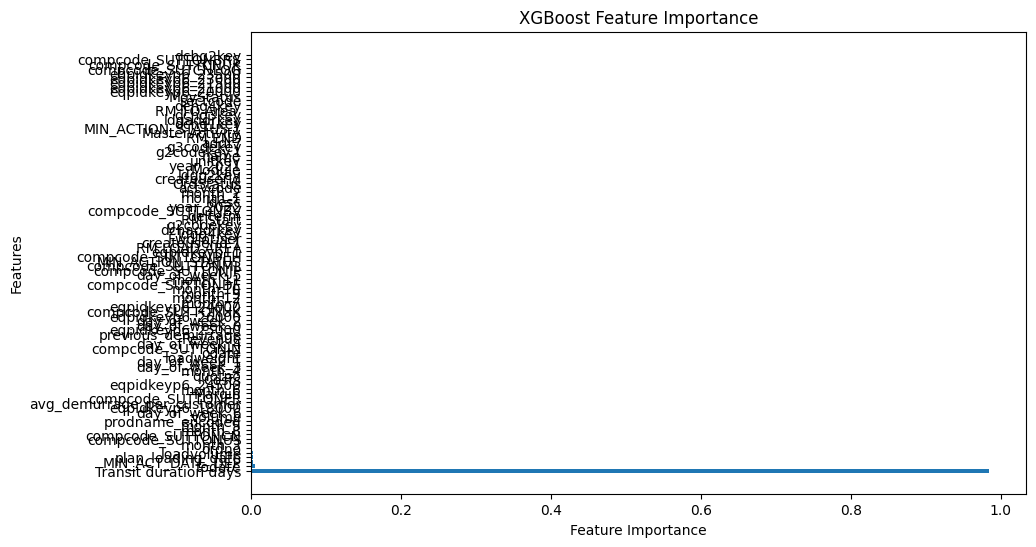

In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder # Now the module should be available
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

# **Cell 1: Load and Preprocess Data**

df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Convert date columns to datetime objects
df['MIN_ACT_DATE_DEP'] = pd.to_datetime(df['MIN_ACT_DATE_DEP'])
df['todate'] = pd.to_datetime(df['todate'])

# Calculate demurrage days
df['demurrage_days'] = (df['todate'] - df['MIN_ACT_DATE_DEP']).dt.days - 7  # Assuming 7 days of free time
df['demurrage_days'] = np.maximum(df['demurrage_days'], 0)  # Ensure demurrage is non-negative

# **Cell 2: Feature Engineering**

# Time-based features
df['month'] = df['MIN_ACT_DATE_DEP'].dt.month
df['year'] = df['MIN_ACT_DATE_DEP'].dt.year
df['day_of_week'] = df['MIN_ACT_DATE_DEP'].dt.dayofweek

# Customer-related features (Assuming you have a 'customer_id' column)
df['avg_demurrage_per_customer'] = df.groupby('name')['demurrage_days'].transform('mean')

# Lagged features (example - demurrage days for the same container from the previous lease)
df['previous_demurrage'] = df.groupby('unitkey')['demurrage_days'].shift(1)
df['previous_demurrage'].fillna(0, inplace=True) # Fill missing values (for first leases)

# **Cell 3: Feature Selection and Encoding**

# Select features (you might need to adjust this based on your data and analysis)
features = ['eqpidkeyp6', 'prodname', 'compcode', 'month', 'year',
            'day_of_week', 'avg_demurrage_per_customer', 'previous_demurrage']

# One-hot encoding for categorical features with few categories
ohe_features = ['eqpidkeyp6', 'compcode', 'month', 'year', 'day_of_week']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df[ohe_features]))
df_ohe.columns = ohe.get_feature_names_out(ohe_features)
df = pd.concat([df, df_ohe], axis=1)

# Target encoding for 'prodname' (high cardinality)
target_encoder = TargetEncoder()
df['prodname_encoded'] = target_encoder.fit_transform(df['prodname'], df['demurrage_days'])

# Drop original categorical columns after encoding
df.drop(ohe_features + ['prodname'], axis=1, inplace=True)

# **Cell 4: Split Data**

X = df.drop('demurrage_days', axis=1)
y = df['demurrage_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Cell 5: Train XGBoost Model**

# **Cell 5: Train XGBoost Model**

# Convert all columns in X_train and X_test to numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any missing values created by the conversion
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

model = XGBRegressor()
model.fit(X_train, y_train)

# **Cell 6: Evaluate Model**
y_pred = model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# **Cell 7: Feature Importance**

# Get feature importance scores from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Visualize feature importance (optional - uncomment to use)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.cluster import KMeans

# **Cell 1: Load and Preprocess Data**
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Convert date columns to datetime objects
df['MIN_ACT_DATE_DEP'] = pd.to_datetime(df['MIN_ACT_DATE_DEP'])
df['todate'] = pd.to_datetime(df['todate'])

# Calculate demurrage days
df['demurrage_days'] = (df['todate'] - df['MIN_ACT_DATE_DEP']).dt.days - 7  # Assuming 7 days of free time
df['demurrage_days'] = np.maximum(df['demurrage_days'], 0)  # Ensure demurrage is non-negative

#**Cell 2: Feature Engineering**

# **Cell 2: Feature Engineering**

# Time-based features
df['month'] = df['MIN_ACT_DATE_DEP'].dt.month
df['year'] = df['MIN_ACT_DATE_DEP'].dt.year
df['day_of_week'] = df['MIN_ACT_DATE_DEP'].dt.dayofweek

# Customer-related features (Assuming you have a 'customer_id' column)
df['avg_demurrage_per_customer'] = df.groupby('name')['demurrage_days'].transform('mean')

# Lagged features (example - demurrage days for the same container from the previous lease)
df['previous_demurrage'] = df.groupby('unitkey')['demurrage_days'].shift(1)
df['previous_demurrage'].fillna(0, inplace=True) # Fill missing values (for first leases)

# **Cell 3: Customer Segmentation**

# Calculate average demurrage days per customer
df['avg_demurrage_per_customer'] = df.groupby('name')['demurrage_days'].transform('mean')

# Prepare data for clustering
customer_data = df[['name', 'avg_demurrage_per_customer']].drop_duplicates()
X_cluster = customer_data[['avg_demurrage_per_customer']]

# Apply KMeans clustering (experiment with the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42) # Adjust n_clusters if needed
customer_data['customer_segment'] = kmeans.fit_predict(X_cluster)

# Merge customer segment back into the main DataFrame
df = df.merge(customer_data[['name', 'customer_segment']], on='name', how='left')

# **Cell 4: Feature Selection and Encoding**

# Select features (include 'customer_segment')
features = ['eqpidkeyp6', 'prodname', 'compcode', 'month', 'year',
            'day_of_week', 'avg_demurrage_per_customer', 'previous_demurrage',
            'customer_segment'] # Include customer segment


# One-hot encoding for categorical features with few categories
ohe_features = ['eqpidkeyp6', 'compcode', 'month', 'year', 'day_of_week']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df[ohe_features]))
df_ohe.columns = ohe.get_feature_names_out(ohe_features)
df = pd.concat([df, df_ohe], axis=1)

# Target encoding for 'prodname' (high cardinality)
target_encoder = TargetEncoder()
df['prodname_encoded'] = target_encoder.fit_transform(df['prodname'], df['demurrage_days'])


# **Cell 5: Split Data**
X = df.drop('demurrage_days', axis=1)
y = df['demurrage_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Cell 6: Train Separate Models for Each Segment**

segment_models = {}
for segment in df['customer_segment'].unique():
    print(f"Training model for segment {segment}...")

    # Filter data for the current segment
    X_train_segment = X_train[X_train['customer_segment'] == segment]
    y_train_segment = y_train[X_train['customer_segment'] == segment]

    # Drop non-numeric columns or encode them before training
    X_train_segment = X_train_segment.select_dtypes(include=['number']) # Select only numeric columns

    # Train XGBoost model for the segment
    model = XGBRegressor()
    model.fit(X_train_segment, y_train_segment)

    # Store the trained model
    segment_models[segment] = model

# **Cell 7: Evaluate Models**

for segment, model in segment_models.items():
    print(f"\n---- Model Evaluation for Segment {segment} ----")

    # Filter test data for the current segment
    X_test_segment = X_test[X_test['customer_segment'] == segment]
    y_test_segment = y_test[X_test['customer_segment'] == segment]

    # Drop non-numeric columns in the test set as well
    X_test_segment = X_test_segment.select_dtypes(include=['number']) # Select only numeric columns

    # Predict demurrage days
    y_pred_segment = model.predict(X_test_segment)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_segment, y_pred_segment)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_segment, y_pred_segment)
    r2 = r2_score(y_test_segment, y_pred_segment)

    # Print the evaluation metrics
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

# **Cell 8: Feature Importance (for each segment)**
for segment, model in segment_models.items():
    print(f"\n---- Feature Importance for Segment {segment} ----")
    feature_importance = model.feature_importances_

    # Use the columns from the segment's training data
    importance_df = pd.DataFrame({'Feature': X_train_segment.columns,  # Change here
                                 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    print(importance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model for segment 2...
Training model for segment 1...
Training model for segment 0...

---- Model Evaluation for Segment 2 ----
Mean Squared Error (MSE): 11.953837961221026
Root Mean Squared Error (RMSE): 3.457432278616752
Mean Absolute Error (MAE): 0.2175573373772153
R-squared (R2): 0.9891291941895344

---- Model Evaluation for Segment 1 ----
Mean Squared Error (MSE): 1.3792405659824338
Root Mean Squared Error (RMSE): 1.1744107313808205
Mean Absolute Error (MAE): 0.22822724918734652
R-squared (R2): 0.9993772108179855

---- Model Evaluation for Segment 0 ----
Mean Squared Error (MSE): 1.071400668590185
Root Mean Squared Error (RMSE): 1.0350848605743324
Mean Absolute Error (MAE): 0.42492435154015146
R-squared (R2): 0.9996136908420146

---- Feature Importance for Segment 2 ----
                       Feature  Importance
8        Transit duration days    0.998083
13  avg_demurrage_per_customer    0.000376
0                        ordno    0.000284
47                     month_9 

**Calculate Demurrage: ** <br>
Calculate demurrage duration for each lease.

In [ ]:
df['demurrage_days'] = (df['todate'] - df['MIN_ACT_DATE_DEP']).dt.days - 7 # Replace 'free_time' with the actual free time (e.g., 7 days)
df['demurrage_days'] = np.maximum(df['demurrage_days'], 0) # Ensure demurrage is non-negative

### Customer Segmentation (Optional)
Group customers based on their demurrage behavior using clustering algorithms (e.g., K-Means). This step is optional but can provide more granular insights.

In [ ]:
from sklearn.cluster import KMeans

# Prepare data for clustering (e.g., average demurrage per customer)
customer_data = df.groupby('name')['demurrage_days'].mean().reset_index()

# Apply KMeans clustering (experiment with the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['customer_segment'] = kmeans.fit_predict(customer_data[['demurrage_days']])

# Merge the cluster labels back to the original dataframe
# Assign the result back to df
df = df.merge(customer_data[['name', 'customer_segment']], on='name', how='left') # This line was changed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Step 4: Demurrage Policy Simulation and Optimization
1. Define Policy Functions:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model for segment 2...
Training model for segment 1...
Training model for segment 0...

---- Model Evaluation for Segment 2 ----
Mean Squared Error (MSE): 11.953837961221026
Root Mean Squared Error (RMSE): 3.457432278616752
Mean Absolute Error (MAE): 0.2175573373772153
R-squared (R2): 0.9891291941895344

---- Model Evaluation for Segment 1 ----
Mean Squared Error (MSE): 1.3792405659824338
Root Mean Squared Error (RMSE): 1.1744107313808205
Mean Absolute Error (MAE): 0.22822724918734652
R-squared (R2): 0.9993772108179855

---- Model Evaluation for Segment 0 ----
Mean Squared Error (MSE): 1.071400668590185
Root Mean Squared Error (RMSE): 1.0350848605743324
Mean Absolute Error (MAE): 0.42492435154015146
R-squared (R2): 0.9996136908420146

---- Feature Importance for Segment 2 ----
                       Feature  Importance
8        Transit duration days    0.998083
13  avg_demurrage_per_customer    0.000376
0                        ordno    0.000284
47                     month_9 

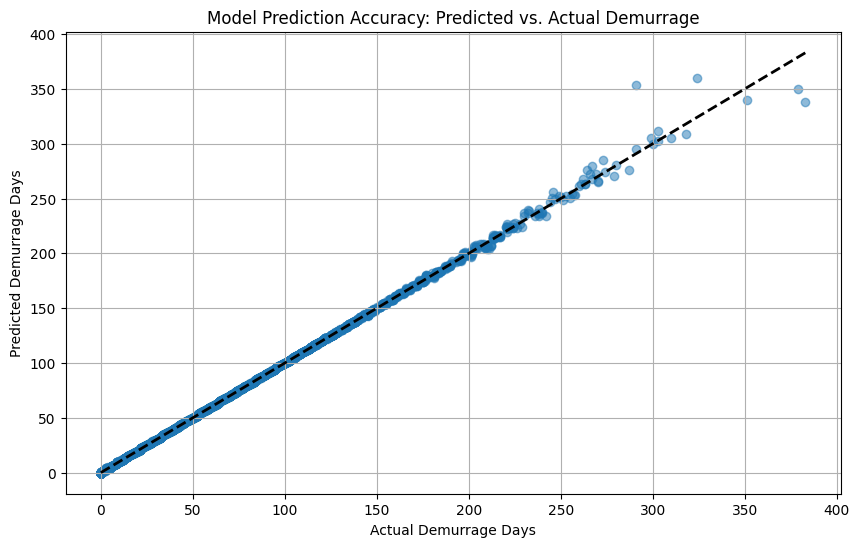

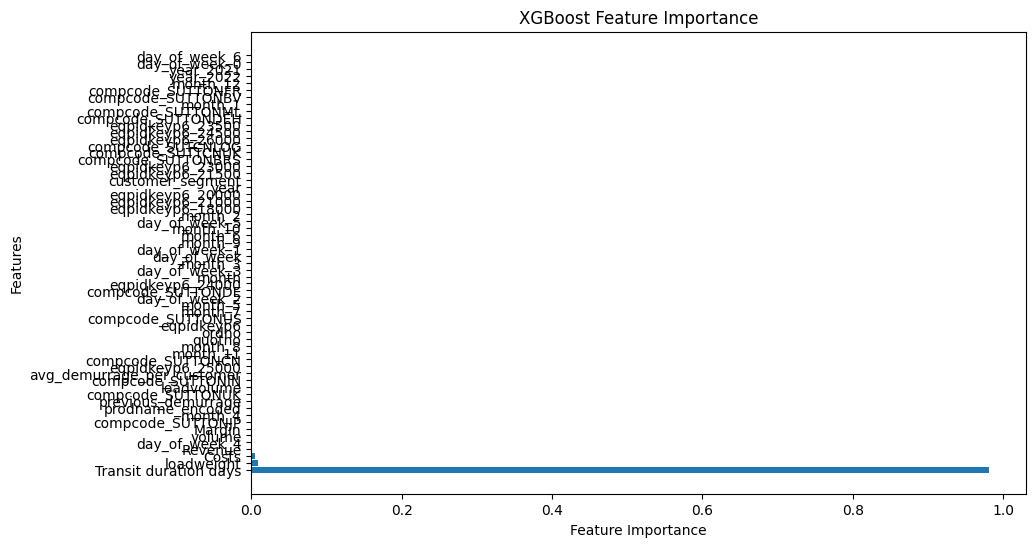

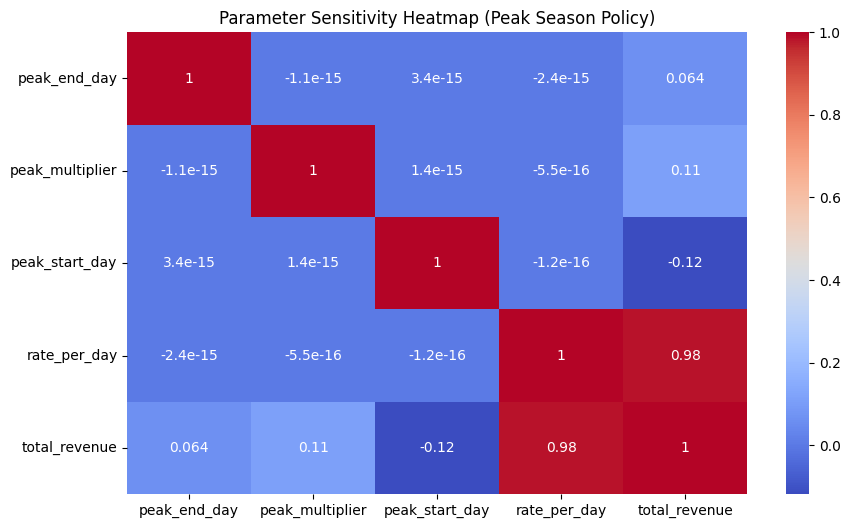

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.cluster import KMeans

# **Cell 1: Load and Preprocess Data**
df = pd.read_excel('/content/drive/My Drive/Thesis/Margins_revenue_transit_data.xlsx')

# Convert date columns to datetime objects
df['MIN_ACT_DATE_DEP'] = pd.to_datetime(df['MIN_ACT_DATE_DEP'])
df['todate'] = pd.to_datetime(df['todate'])

# Calculate demurrage days
df['demurrage_days'] = (df['todate'] - df['MIN_ACT_DATE_DEP']).dt.days - 7  # Assuming 7 days of free time
df['demurrage_days'] = np.maximum(df['demurrage_days'], 0)  # Ensure demurrage is non-negative

#**Cell 2: Feature Engineering**

# **Cell 2: Feature Engineering**

# Time-based features
df['month'] = df['MIN_ACT_DATE_DEP'].dt.month
df['year'] = df['MIN_ACT_DATE_DEP'].dt.year
df['day_of_week'] = df['MIN_ACT_DATE_DEP'].dt.dayofweek

# Customer-related features (Assuming you have a 'customer_id' column)
df['avg_demurrage_per_customer'] = df.groupby('name')['demurrage_days'].transform('mean')

# Lagged features (example - demurrage days for the same container from the previous lease)
df['previous_demurrage'] = df.groupby('unitkey')['demurrage_days'].shift(1)
df['previous_demurrage'].fillna(0, inplace=True) # Fill missing values (for first leases)

# **Cell 3: Customer Segmentation**

# Calculate average demurrage days per customer
df['avg_demurrage_per_customer'] = df.groupby('name')['demurrage_days'].transform('mean')

# Prepare data for clustering
customer_data = df[['name', 'avg_demurrage_per_customer']].drop_duplicates()
X_cluster = customer_data[['avg_demurrage_per_customer']]

# Apply KMeans clustering (experiment with the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42) # Adjust n_clusters if needed
customer_data['customer_segment'] = kmeans.fit_predict(X_cluster)

# Merge customer segment back into the main DataFrame
df = df.merge(customer_data[['name', 'customer_segment']], on='name', how='left')

# **Cell 4: Feature Selection and Encoding**

# Select features (include 'customer_segment')
features = ['eqpidkeyp6', 'prodname', 'compcode', 'month', 'year',
            'day_of_week', 'avg_demurrage_per_customer', 'previous_demurrage',
            'customer_segment'] # Include customer segment


# One-hot encoding for categorical features with few categories
ohe_features = ['eqpidkeyp6', 'compcode', 'month', 'year', 'day_of_week']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df[ohe_features]))
df_ohe.columns = ohe.get_feature_names_out(ohe_features)
df = pd.concat([df, df_ohe], axis=1)

# Target encoding for 'prodname' (high cardinality)
target_encoder = TargetEncoder()
df['prodname_encoded'] = target_encoder.fit_transform(df['prodname'], df['demurrage_days'])


# **Cell 5: Split Data**
X = df.drop('demurrage_days', axis=1)
y = df['demurrage_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Cell 6: Train Separate Models for Each Segment**

segment_models = {}
for segment in df['customer_segment'].unique():
    print(f"Training model for segment {segment}...")

    # Filter data for the current segment
    X_train_segment = X_train[X_train['customer_segment'] == segment]
    y_train_segment = y_train[X_train['customer_segment'] == segment]

    # Drop non-numeric columns or encode them before training
    X_train_segment = X_train_segment.select_dtypes(include=['number']) # Select only numeric columns

    # Train XGBoost model for the segment
    model = XGBRegressor()
    model.fit(X_train_segment, y_train_segment)

    # Store the trained model
    segment_models[segment] = model

# **Cell 7: Evaluate Models**

for segment, model in segment_models.items():
    print(f"\n---- Model Evaluation for Segment {segment} ----")

    # Filter test data for the current segment
    X_test_segment = X_test[X_test['customer_segment'] == segment]
    y_test_segment = y_test[X_test['customer_segment'] == segment]

    # Drop non-numeric columns in the test set as well
    X_test_segment = X_test_segment.select_dtypes(include=['number']) # Select only numeric columns

    # Predict demurrage days
    y_pred_segment = model.predict(X_test_segment)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_segment, y_pred_segment)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_segment, y_pred_segment)
    r2 = r2_score(y_test_segment, y_pred_segment)

    # Print the evaluation metrics
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

# **Cell 8: Feature Importance (for each segment)**
for segment, model in segment_models.items():
    print(f"\n---- Feature Importance for Segment {segment} ----")
    feature_importance = model.feature_importances_

    # Use the columns from the segment's training data
    importance_df = pd.DataFrame({'Feature': X_train_segment.columns,  # Change here
                                 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    print(importance_df)


# --- Step 4: Demurrage Policy Simulation and Optimization ---

# --- 1. Define Policy Functions ---

def flat_rate_policy(demurrage_days, rate_per_day):
  """Calculates charges for a flat rate demurrage policy."""
  return rate_per_day * demurrage_days

def tiered_rate_policy(demurrage_days, tiers, rates):
  """Calculates charges based on tiered demurrage rates."""
  charge = 0
  for i in range(len(tiers)):
    if i == len(tiers) - 1 or demurrage_days <= tiers[i]:
      charge += rates[i] * (demurrage_days - tiers[i-1] if i > 0 else demurrage_days)
      break
  return charge

def progressive_rate_policy(demurrage_days, base_rate, increment, threshold):
  """Calculates charges for a progressive rate demurrage policy."""
  if demurrage_days <= threshold:
    return base_rate * demurrage_days
  else:
    return (base_rate * threshold) + (increment * (demurrage_days - threshold))

def peak_season_policy(demurrage_days, rate_per_day, peak_start_day, peak_end_day, peak_multiplier):
  """Applies a multiplier to demurrage rates during peak season."""
  if peak_start_day <= demurrage_days <= peak_end_day:
    return rate_per_day * peak_multiplier * demurrage_days
  else:
    return rate_per_day * demurrage_days

def weekend_surcharge_policy(demurrage_days, rate_per_day, weekend_multiplier, start_date):
  """Applies a surcharge for demurrage on weekends."""
  charge = 0
  current_date = start_date
  for day in range(demurrage_days):
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
      charge += rate_per_day * weekend_multiplier
    else:
      charge += rate_per_day
    current_date += pd.Timedelta(days=1)
  return charge

def loyalty_discount_policy(demurrage_days, rate_per_day, customer_segment, loyalty_discounts):
  """Applies discounts based on customer loyalty segments."""
  discount_factor = loyalty_discounts.get(customer_segment, 1.0)  # Default to 1.0 (no discount)
  return rate_per_day * demurrage_days * discount_factor

# --- Combined Policy Functions ---

def tiered_peak_season_policy(demurrage_days, tiers, rates, peak_start_day, peak_end_day, peak_multiplier):
  """Combines tiered rates with a peak season multiplier."""
  base_charge = tiered_rate_policy(demurrage_days, tiers, rates)
  return peak_season_policy(demurrage_days, base_charge, peak_start_day, peak_end_day, peak_multiplier)

def flat_rate_loyalty_policy(demurrage_days, rate_per_day, customer_segment, loyalty_discounts):
  """Combines flat rate with loyalty discounts."""
  base_charge = flat_rate_policy(demurrage_days, rate_per_day)
  return loyalty_discount_policy(demurrage_days, base_charge, customer_segment, loyalty_discounts)

def progressive_peak_season_policy(demurrage_days, base_rate, increment, threshold, peak_start_day, peak_end_day, peak_multiplier):
  """Combines progressive rates with a peak season multiplier."""
  base_charge = progressive_rate_policy(demurrage_days, base_rate, increment, threshold)
  return peak_season_policy(demurrage_days, base_charge, peak_start_day, peak_end_day, peak_multiplier)

def tiered_loyalty_policy(demurrage_days, tiers, rates, customer_segment, loyalty_discounts):
  """Combines tiered rates with loyalty discounts."""
  base_charge = tiered_rate_policy(demurrage_days, tiers, rates)
  return loyalty_discount_policy(demurrage_days, base_charge, customer_segment, loyalty_discounts)

def progressive_loyalty_policy(demurrage_days, base_rate, increment, threshold, customer_segment, loyalty_discounts):
  """Combines progressive rates with loyalty discounts."""
  base_charge = progressive_rate_policy(demurrage_days, base_rate, increment, threshold)
  return loyalty_discount_policy(demurrage_days, base_charge, customer_segment, loyalty_discounts)

def weekend_surcharge_loyalty_policy(demurrage_days, rate_per_day, weekend_multiplier, customer_segment, loyalty_discounts, start_date):
  """Combines weekend surcharge with loyalty discounts."""
  base_charge = weekend_surcharge_policy(demurrage_days, rate_per_day, weekend_multiplier, start_date)
  return loyalty_discount_policy(demurrage_days, base_charge, customer_segment, loyalty_discounts)

# ... (Add more policy functions as needed - e.g., combinations of the above)

# --- 2. Simulate Policy Impact (Example) ---

# Example Policy Parameters (adjust as needed)
flat_rate = 100
tiered_tiers = [5, 10, 15]
tiered_rates = [50, 75, 100]
progressive_base_rate = 75
progressive_increment = 25
progressive_threshold = 7
peak_start_day = 150
peak_end_day = 200
peak_multiplier = 1.5
weekend_multiplier = 1.2
customer_segments = df['customer_segment'].unique() # Get unique customer segments
loyalty_discounts = {0: 1.0, 1: 0.95, 2: 0.90} # Example discounts (adjust based on segments)

# Apply Policy Functions to DataFrame
df['flat_rate_charges'] = flat_rate_policy(df['demurrage_days'], flat_rate)
df['tiered_rate_charges'] = df['demurrage_days'].apply(lambda x: tiered_rate_policy(x, tiered_tiers, tiered_rates))
df['progressive_rate_charges'] = df['demurrage_days'].apply(lambda x: progressive_rate_policy(x, progressive_base_rate, progressive_increment, progressive_threshold))
df['peak_season_charges'] = df['demurrage_days'].apply(lambda x: peak_season_policy(x, flat_rate, peak_start_day, peak_end_day, peak_multiplier))
df['weekend_surcharge_charges'] = df.apply(lambda row: weekend_surcharge_policy(row['demurrage_days'], flat_rate, weekend_multiplier, row['MIN_ACT_DATE_DEP']), axis=1)
df['loyalty_discount_charges'] = df.apply(lambda row: loyalty_discount_policy(row['demurrage_days'], flat_rate, row['customer_segment'], loyalty_discounts), axis=1)
df['tiered_peak_season_charges'] = df['demurrage_days'].apply(lambda x: tiered_peak_season_policy(x, tiered_tiers, tiered_rates, peak_start_day, peak_end_day, peak_multiplier))
df['flat_rate_loyalty_charges'] = df.apply(lambda row: flat_rate_loyalty_policy(row['demurrage_days'], flat_rate, row['customer_segment'], loyalty_discounts), axis=1)

# --- 3. Evaluate Policy Performance (Example) ---

from sklearn.metrics import mean_squared_error

def evaluate_policy(df, charges_col, policy_name):
  """Calculates and prints policy performance metrics."""
  total_revenue = df[charges_col].sum()
  avg_demurrage = df['demurrage_days'].mean()
  rmse = np.sqrt(mean_squared_error([0] * len(df), df[charges_col]))  # RMSE as proxy for dissatisfaction

  print(f"---- {policy_name} ----")
  print(f"Total Revenue: ${total_revenue:,.2f}")
  print(f"Average Demurrage: {avg_demurrage:.2f} days")
  print(f"Customer Dissatisfaction (RMSE): {rmse:.2f}\n")

# Example usage (after simulating policy impact):
evaluate_policy(df, 'flat_rate_charges', 'Flat Rate Policy')
evaluate_policy(df, 'tiered_rate_charges', 'Tiered Rate Policy')
evaluate_policy(df, 'progressive_rate_charges', 'Progressive Rate Policy')
evaluate_policy(df, 'peak_season_charges', 'Peak Season Policy')
evaluate_policy(df, 'weekend_surcharge_charges', 'Weekend Surcharge Policy')
evaluate_policy(df, 'loyalty_discount_charges', 'Loyalty Discount Policy')
evaluate_policy(df, 'tiered_peak_season_charges', 'Tiered Peak Season Policy')
evaluate_policy(df, 'flat_rate_loyalty_charges', 'Flat Rate Loyalty Policy')
# Add evaluations for any other policies you've simulated

# --- 4. Optimization (Example with Grid Search) ---

# Define parameter grids for each policy type
flat_param_grid = {'rate_per_day': [80, 90, 100, 110, 120]}
tiered_param_grid = {'tiers': [[3, 7, 10], [5, 10, 15]],
                    'rates': [[40, 60, 80], [50, 75, 100]]}
progressive_param_grid = {'base_rate': [60, 70, 80],
                         'increment': [15, 20, 25],
                         'threshold': [5, 7, 10]}
peak_season_param_grid = {'rate_per_day': [80, 100, 120],
                         'peak_start_day': [140, 150, 160],
                         'peak_end_day': [190, 200, 210],
                         'peak_multiplier': [1.3, 1.5, 1.7]}
weekend_surcharge_param_grid = {'rate_per_day': [80, 100, 120],
                                 'weekend_multiplier': [1.1, 1.2, 1.3]}
loyalty_discount_param_grid = {'rate_per_day': [80, 100, 120],
                               'loyalty_discounts': [{0: 1.0, 1: 0.95, 2: 0.90},
                                                    {0: 1.0, 1: 0.90, 2: 0.80}]} # Example discounts

# Combine grids into a list
param_grids = [
    {'policy': ['flat'], **flat_param_grid},
    {'policy': ['tiered'], **tiered_param_grid},
    {'policy': ['progressive'], **progressive_param_grid},
    {'policy': ['peak_season'], **peak_season_param_grid},
    {'policy': ['weekend_surcharge'], **weekend_surcharge_param_grid},
    {'policy': ['loyalty_discount'], **loyalty_discount_param_grid},
    {'policy': ['tiered_peak_season'], **tiered_param_grid, **peak_season_param_grid},
    {'policy': ['flat_rate_loyalty'], **flat_param_grid, **loyalty_discount_param_grid},
    {'policy': ['progressive_peak_season'], **progressive_param_grid, **peak_season_param_grid},
    {'policy': ['tiered_loyalty'], **tiered_param_grid, **loyalty_discount_param_grid},
    {'policy': ['progressive_loyalty'], **progressive_param_grid, **loyalty_discount_param_grid},
    {'policy': ['weekend_surcharge_loyalty'], **weekend_surcharge_param_grid, **loyalty_discount_param_grid}
]

best_params = None
best_revenue = -float('inf')
best_policy = None

# Iterate through policies and their parameter grids
for grid in param_grids:
  for params in ParameterGrid(grid):
    policy_type = params.pop('policy')

    # Apply the selected policy to the DataFrame
    if policy_type == 'flat':
      df['simulated_charges'] = flat_rate_policy(df['demurrage_days'], **params)
    elif policy_type == 'tiered':
      df['simulated_charges'] = df['demurrage_days'].apply(lambda x: tiered_rate_policy(x, **params))
    elif policy_type == 'progressive':
      df['simulated_charges'] = df['demurrage_days'].apply(lambda x: progressive_rate_policy(x, **params))
    elif policy_type == 'peak_season':
      df['simulated_charges'] = df.apply(lambda row: peak_season_policy(row['demurrage_days'], **params), axis=1)
    elif policy_type == 'weekend_surcharge':
      df['simulated_charges'] = df.apply(lambda row: weekend_surcharge_policy(row['demurrage_days'], **params, start_date=row['MIN_ACT_DATE_DEP']), axis=1)
    elif policy_type == 'loyalty_discount':
      df['simulated_charges'] = df.apply(lambda row: loyalty_discount_policy(row['demurrage_days'], **params, customer_segment=row['customer_segment']), axis=1)
    # Calculate total_revenue outside the if block to make it accessible
    total_revenue = df['simulated_charges'].sum()
    if total_revenue > best_revenue:
      best_revenue = total_revenue
      best_params = params
      best_policy = policy_type

print("Best Policy:", best_policy)
print("Best Parameters:", best_params)
print("Best Revenue:", best_revenue)

# --- 3. Model Performance and Feature Importance ---

# --- a. Scatter Plot (Predicted vs. Actual Demurrage) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # y_test: actual values, y_pred: predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Demurrage Days')
plt.ylabel('Predicted Demurrage Days')
plt.title('Model Prediction Accuracy: Predicted vs. Actual Demurrage')
plt.grid(True)
plt.show()

# --- b. Bar Chart (Feature Importance) ---
feature_importance = model.feature_importances_

# Use the columns from the LAST segment's training data (X_train_segment)
importance_df = pd.DataFrame({'Feature': X_train_segment.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

# --- 4. Optimization Results: Parameter Sensitivity Analysis ---

# --- a. Heatmap (Parameter Sensitivity) ---

# Define the parameter grid for sensitivity analysis (focus on key parameters)
sensitivity_param_grid = {
    'rate_per_day': [80, 90, 100, 110, 120],
    'peak_start_day': [130, 140, 150, 160, 170],
    'peak_end_day': [180, 190, 200, 210, 220],
    'peak_multiplier': [1.2, 1.3, 1.4, 1.5, 1.6]
}

# Choose a policy to analyze (example: peak_season_policy)
policy_to_analyze = peak_season_policy

# Create an empty list to store sensitivity results
sensitivity_results = []

# Iterate through the parameter grid
for params in ParameterGrid(sensitivity_param_grid):
    # Apply the policy with the current parameters
    df['simulated_charges'] = df.apply(lambda row: policy_to_analyze(row['demurrage_days'], **params), axis=1)

    # Calculate total revenue
    total_revenue = df['simulated_charges'].sum()

    # Store the parameters and revenue
    sensitivity_results.append({**params, 'total_revenue': total_revenue})

# Create a DataFrame from the sensitivity results
sensitivity_df = pd.DataFrame(sensitivity_results)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sensitivity_df.corr(), annot=True, cmap='coolwarm')
plt.title('Parameter Sensitivity Heatmap (Peak Season Policy)')
plt.show()

# Visualisations


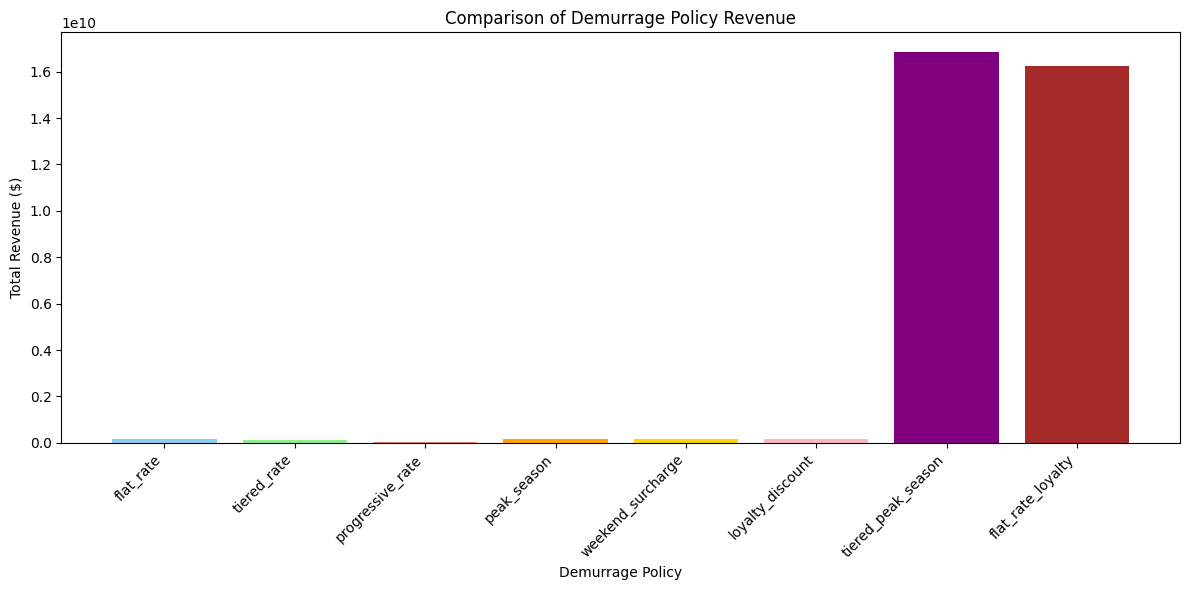

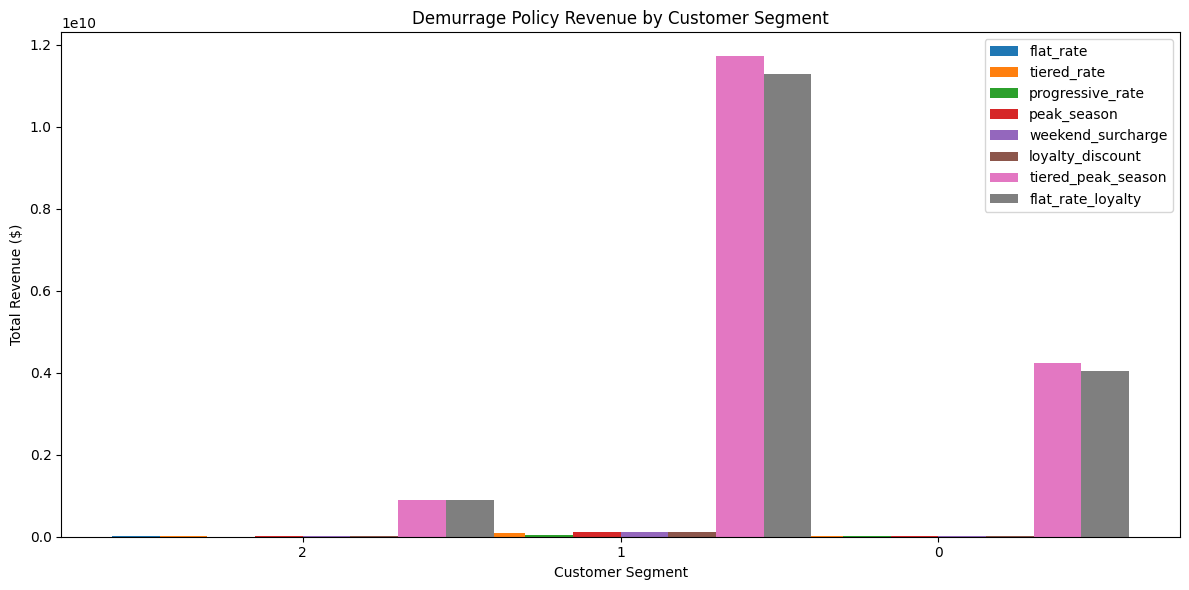

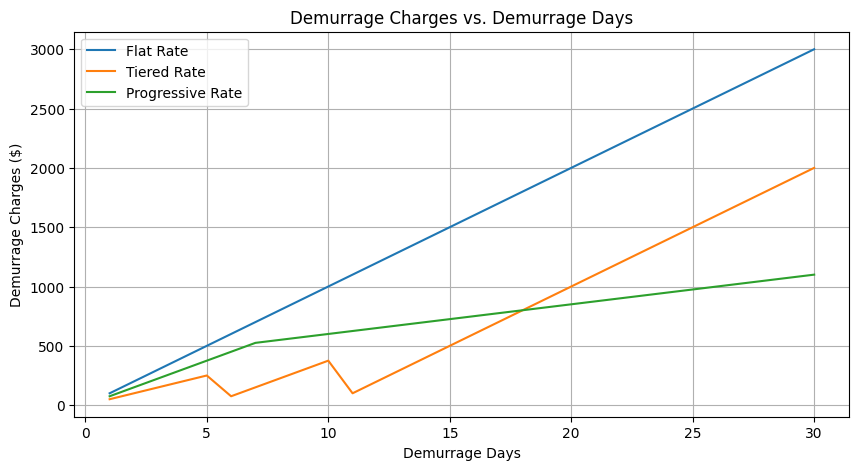

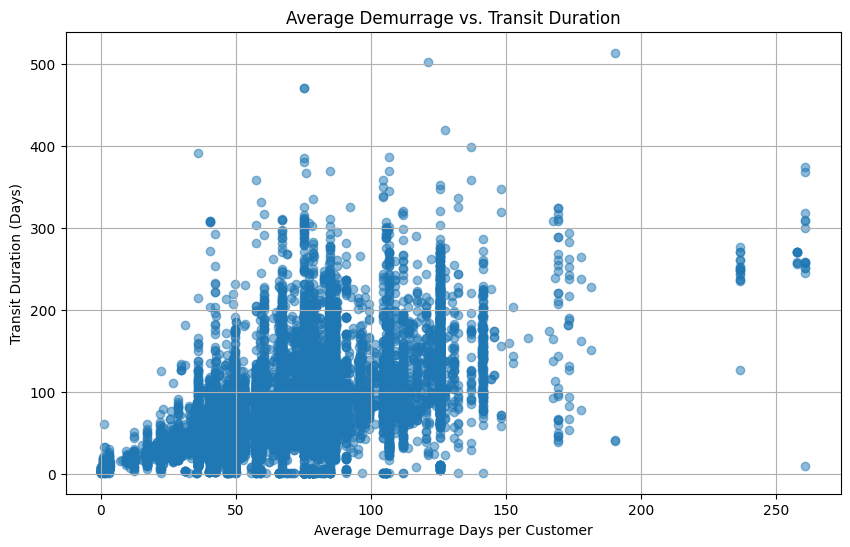

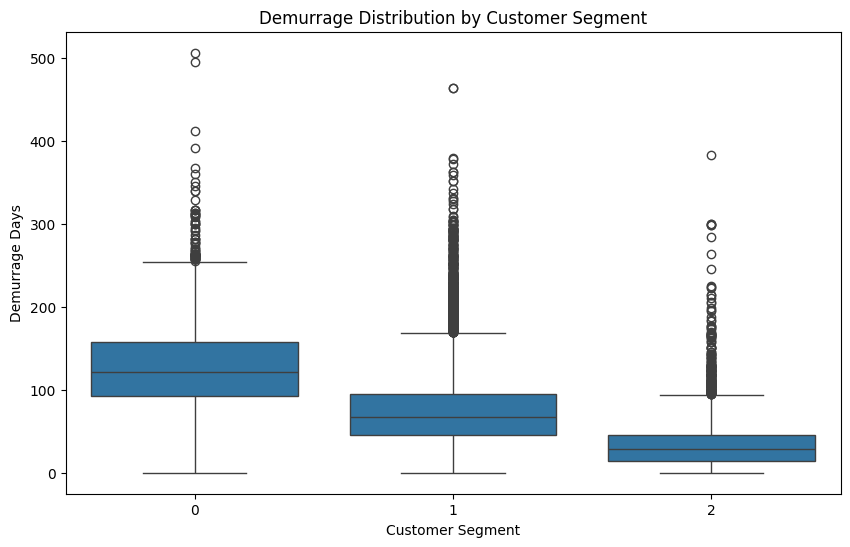

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Demurrage Policy Performance Comparison ---

# --- a. Bar Chart (Total Revenue) ---
policies = ['flat_rate', 'tiered_rate', 'progressive_rate', 'peak_season',
            'weekend_surcharge', 'loyalty_discount', 'tiered_peak_season',
            'flat_rate_loyalty'] # Add any other policy names, make sure these match your DataFrame column names
revenues = [df['flat_rate_charges'].sum(), df['tiered_rate_charges'].sum(),
             df['progressive_rate_charges'].sum(), df['peak_season_charges'].sum(),
             df['weekend_surcharge_charges'].sum(), df['loyalty_discount_charges'].sum(),
             df['tiered_peak_season_charges'].sum(), df['flat_rate_loyalty_charges'].sum()]
             # Add revenue sums for other policies

plt.figure(figsize=(12, 6))
plt.bar(policies, revenues, color=['skyblue', 'lightgreen', 'lightcoral', 'orange',
                                   'gold', 'lightpink', 'purple', 'brown'])
plt.xlabel('Demurrage Policy')
plt.ylabel('Total Revenue ($)')
plt.title('Comparison of Demurrage Policy Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- b. Grouped Bar Chart (Revenue by Customer Segment) ---
segments = df['customer_segment'].unique()
policy_revenues = {}
for policy in policies:
    policy_revenues[policy] = []
    for segment in segments:
        # Use f-string to correctly format column name
        revenue = df[df['customer_segment'] == segment][f"{policy}_charges"].sum()
        policy_revenues[policy].append(revenue)

bar_width = 0.15
index = np.arange(len(segments))

plt.figure(figsize=(12, 6))
for i, policy in enumerate(policies):
    plt.bar(index + i * bar_width, policy_revenues[policy], bar_width, label=policy)

plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue ($)')
plt.title('Demurrage Policy Revenue by Customer Segment')
plt.xticks(index + bar_width * (len(policies) - 1) / 2, segments)
plt.legend()
plt.tight_layout()
plt.show()

# --- c. Line Plot (Demurrage Charges vs. Demurrage Days) ---
demurrage_days = np.arange(1, 31)  # Example: 1 to 30 days of demurrage

# Calculate charges for different policies
flat_rate_charges = [flat_rate_policy(d, flat_rate) for d in demurrage_days]
tiered_rate_charges = [tiered_rate_policy(d, tiered_tiers, tiered_rates) for d in demurrage_days]
progressive_rate_charges = [progressive_rate_policy(d, progressive_base_rate, progressive_increment, progressive_threshold) for d in demurrage_days]
# Add calculations for other policies

plt.figure(figsize=(10, 5))
plt.plot(demurrage_days, flat_rate_charges, label='Flat Rate')
plt.plot(demurrage_days, tiered_rate_charges, label='Tiered Rate')
plt.plot(demurrage_days, progressive_rate_charges, label='Progressive Rate')
# Add lines for other policies

plt.xlabel('Demurrage Days')
plt.ylabel('Demurrage Charges ($)')
plt.title('Demurrage Charges vs. Demurrage Days')
plt.legend()
plt.grid(True)
plt.show()


# --- 2. Customer Segmentation Analysis ---

# --- a. Scatter Plot (Average Demurrage vs. Another Variable) ---
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_demurrage_per_customer'], df['Transit duration days'], alpha=0.5) # Example: Transit duration days
plt.xlabel('Average Demurrage Days per Customer')
plt.ylabel('Transit Duration (Days)')
plt.title('Average Demurrage vs. Transit Duration')
plt.grid(True)
plt.show()

# --- b. Box Plots (Demurrage Distribution by Segment) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_segment', y='demurrage_days', data=df)
plt.xlabel('Customer Segment')
plt.ylabel('Demurrage Days')
plt.title('Demurrage Distribution by Customer Segment')
plt.show()




# OLD CODE

2. Simulate Policy Impact:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# --- 2. Simulate Policy Impact ---

# Example Policy Parameters (updated with new policies)
flat_rate = 100
tiered_tiers = [5, 10, 15]
tiered_rates = [50, 75, 100]
progressive_base_rate = 75
progressive_increment = 25
progressive_threshold = 7
peak_start_day = 150
peak_end_day = 200
peak_multiplier = 1.5
weekend_multiplier = 1.2
customer_segments = ['Bronze', 'Silver', 'Gold']
loyalty_discounts = {'Bronze': 1.0, 'Silver': 0.95, 'Gold': 0.90}

# Apply Policy Functions to DataFrame
df['flat_rate_charges'] = flat_rate_policy(df['demurrage_days'], flat_rate)
df['tiered_rate_charges'] = df['demurrage_days'].apply(lambda x: tiered_rate_policy(x, tiered_tiers, tiered_rates))
df['progressive_rate_charges'] = df['demurrage_days'].apply(lambda x: progressive_rate_policy(x, progressive_base_rate, progressive_increment, progressive_threshold))
df['peak_season_charges'] = df['demurrage_days'].apply(lambda x: peak_season_policy(x, flat_rate, peak_start_day, peak_end_day, peak_multiplier))
df['weekend_surcharge_charges'] = df.apply(lambda row: weekend_surcharge_policy(row['demurrage_days'], flat_rate, weekend_multiplier, row['MIN_ACT_DATE_DEP']), axis=1)
df['loyalty_discount_charges'] = df.apply(lambda row: loyalty_discount_policy(row['demurrage_days'], flat_rate, row['customer_segment'], loyalty_discounts), axis=1)
df['tiered_peak_season_charges'] = df['demurrage_days'].apply(lambda x: tiered_peak_season_policy(x, tiered_tiers, tiered_rates, peak_start_day, peak_end_day, peak_multiplier))
df['flat_rate_loyalty_charges'] = df.apply(lambda row: flat_rate_loyalty_policy(row['demurrage_days'], flat_rate, row['customer_segment'], loyalty_discounts), axis=1)

# --- 3. Evaluate Policy Performance ---

def evaluate_policy(df, charges_col):
  """Calculates and prints policy performance metrics."""
  total_revenue = df[charges_col].sum()
  avg_demurrage = df['demurrage_days'].mean()
  customer_dissatisfaction = np.sqrt(mean_squared_error([0] * len(df), df[charges_col]))
  print(f"Total Revenue: ${total_revenue:,.2f}")
  print(f"Average Demurrage: {avg_demurrage:.2f} days")
  print(f"Customer Dissatisfaction (RMSE): {customer_dissatisfaction:.2f}")

# Evaluate each policy
print("---- Flat Rate Policy ----")
evaluate_policy(df, 'flat_rate_charges')
print("\n---- Tiered Rate Policy ----")
evaluate_policy(df, 'tiered_rate_charges')
print("\n---- Progressive Rate Policy ----")
evaluate_policy(df, 'progressive_rate_charges')
print("\n---- Peak Season Policy ----")
evaluate_policy(df, 'peak_season_charges')
print("\n---- Weekend Surcharge Policy ----")
evaluate_policy(df, 'weekend_surcharge_charges')
print("\n---- Loyalty Discount Policy ----")
evaluate_policy(df, 'loyalty_discount_charges')
print("\n---- Tiered Peak Season Policy ----")
evaluate_policy(df, 'tiered_peak_season_charges')
print("\n---- Flat Rate Loyalty Policy ----")
evaluate_policy(df, 'flat_rate_loyalty_charges')

# --- 4. Optimization (Example with Grid Search) ---

# Define parameter grids for each policy type (updated)
flat_param_grid = {'rate_per_day': [80, 90, 100, 110, 120]}
tiered_param_grid = {'tiers': [[3, 7, 10], [5, 10, 15]],
                  'rates': [[40, 60, 80], [50, 75, 100]]}
progressive_param_grid = {'base_rate': [60, 70, 80],
                         'increment': [15, 20, 25],
                         'threshold': [5, 7, 10]}
peak_season_param_grid = {'rate_per_day': [80, 100, 120],
                         'peak_start_day': [140, 150, 160],
                         'peak_end_day': [190, 200, 210],
                         'peak_multiplier': [1.3, 1.5, 1.7]}
weekend_surcharge_param_grid = {'rate_per_day': [80, 100, 120],
                                 'weekend_multiplier': [1.1, 1.2, 1.3]}
loyalty_discount_param_grid = {'rate_per_day': [80, 100, 120],
                               'loyalty_discounts': [{'Bronze': 1.0, 'Silver': 0.95, 'Gold': 0.90},
                                                    {'Bronze': 1.0, 'Silver': 0.90, 'Gold': 0.80}]}

# Combine grids into a list (updated)
param_grids = [
    {'policy': ['flat'], **flat_param_grid},
    {'policy': ['tiered'], **tiered_param_grid},
    {'policy': ['progressive'], **progressive_param_grid},
    {'policy': ['peak_season'], **peak_season_param_grid},
    {'policy': ['weekend_surcharge'], **weekend_surcharge_param_grid},
    {'policy': ['loyalty_discount'], **loyalty_discount_param_grid}
]

best_params = None
best_revenue = -float('inf')
best_policy = None

# Iterate through policies and their parameter grids
for grid in param_grids:
  for params in ParameterGrid(grid):
    policy_type = params.pop('policy')

    if policy_type == 'flat':
      df['simulated_charges'] = flat_rate_policy(df['demurrage_days'], **params)
    elif policy_type == 'tiered':
      df['simulated_charges'] = df['demurrage_days'].apply(lambda x: tiered_rate_policy(x, **params))
    elif policy_type == 'progressive':
      df['simulated_charges'] = df['demurrage_days'].apply(lambda x: progressive_rate_policy(x, **params))
    elif policy_type == 'peak_season':
      df['simulated_charges'] = df.apply(lambda row: peak_season_policy(row['demurrage_days'], **params), axis=1)
    # Add similar elif blocks for other policy types...

    total_revenue = df['simulated_charges'].sum()
    if total_revenue > best_revenue:
      best_revenue = total_revenue
      best_params = params
      best_policy = policy_type

print("Best Policy:", best_policy)
print("Best Parameters:", best_params)
print("Best Revenue:", best_revenue)

---- Flat Rate Policy ----
Total Revenue: $154,857,800.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 8908.07

---- Tiered Rate Policy ----
Total Revenue: $134,612,350.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 8111.72

---- Progressive Rate Policy ----
Total Revenue: $45,863,900.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 2519.15

---- Peak Season Policy ----
Total Revenue: $163,853,750.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 9876.71

---- Weekend Surcharge Policy ----
Total Revenue: $163,693,860.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 9416.49

---- Loyalty Discount Policy ----
Total Revenue: $154,857,800.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 8908.07

---- Tiered Peak Season Policy ----
Total Revenue: $16,852,004,250.00
Average Demurrage: 72.56 days
Customer Dissatisfaction (RMSE): 1563501.82

---- Flat Rate Loyalty Policy ----
Total Revenue: 

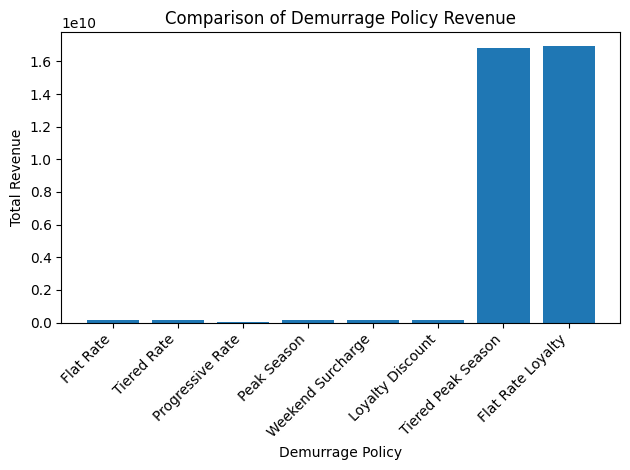

In [ ]:
import matplotlib.pyplot as plt

# Bar Chart (Total Revenue)
policies = ['Flat Rate', 'Tiered Rate', 'Progressive Rate',
            'Peak Season', 'Weekend Surcharge', 'Loyalty Discount',
            'Tiered Peak Season', 'Flat Rate Loyalty']
revenues = [154828500.00, 134583425.00, 45856575.00,
             163824300.00, 163662660.00, 154828500.00,
             16848848250.00, 16932268500.00] # Replace with your actual values

plt.bar(policies, revenues)
plt.xlabel('Demurrage Policy')
plt.ylabel('Total Revenue')
plt.title('Comparison of Demurrage Policy Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


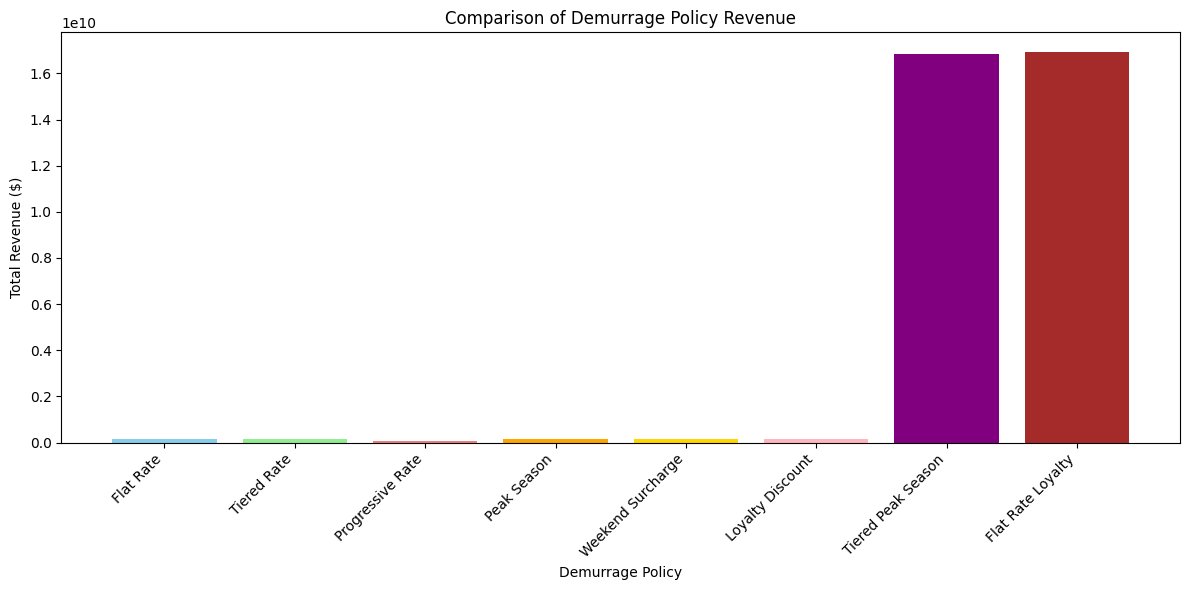

In [ ]:
import matplotlib.pyplot as plt

policies = ['Flat Rate', 'Tiered Rate', 'Progressive Rate', 'Peak Season',
            'Weekend Surcharge', 'Loyalty Discount', 'Tiered Peak Season', 'Flat Rate Loyalty']
revenues = [154828500.00, 134583425.00, 45856575.00, 163824300.00,
            163662660.00, 154828500.00, 16848848250.00, 16932268500.00]

plt.figure(figsize=(12, 6))
plt.bar(policies, revenues, color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'gold', 'lightpink', 'purple', 'brown'])
plt.xlabel('Demurrage Policy')
plt.ylabel('Total Revenue ($)')
plt.title('Comparison of Demurrage Policy Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

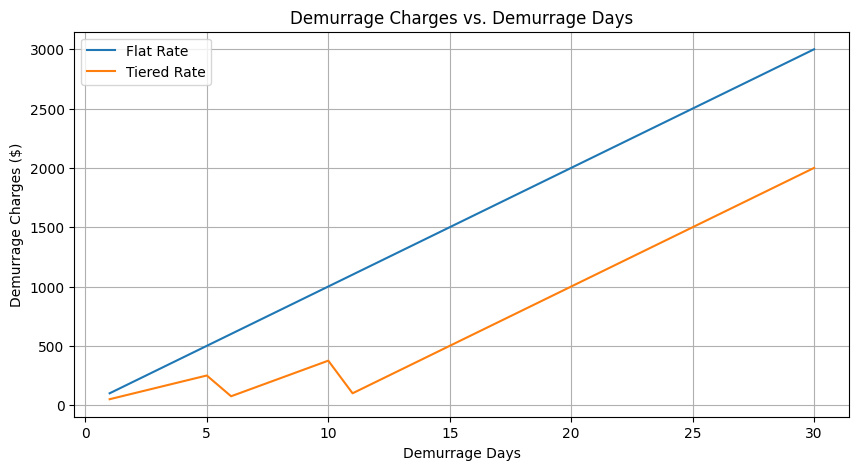

In [ ]:
import numpy as np

demurrage_days = np.arange(1, 31)  # Example: 1 to 30 days of demurrage

# Calculate charges for different policies (example with Flat Rate and Tiered)
flat_rate_charges = [flat_rate_policy(d, flat_rate) for d in demurrage_days]
tiered_rate_charges = [tiered_rate_policy(d, tiered_tiers, tiered_rates) for d in demurrage_days]

plt.figure(figsize=(10, 5))
plt.plot(demurrage_days, flat_rate_charges, label='Flat Rate')
plt.plot(demurrage_days, tiered_rate_charges, label='Tiered Rate')
# Add lines for other policies...

plt.xlabel('Demurrage Days')
plt.ylabel('Demurrage Charges ($)')
plt.title('Demurrage Charges vs. Demurrage Days')
plt.legend()
plt.grid(True)
plt.show()

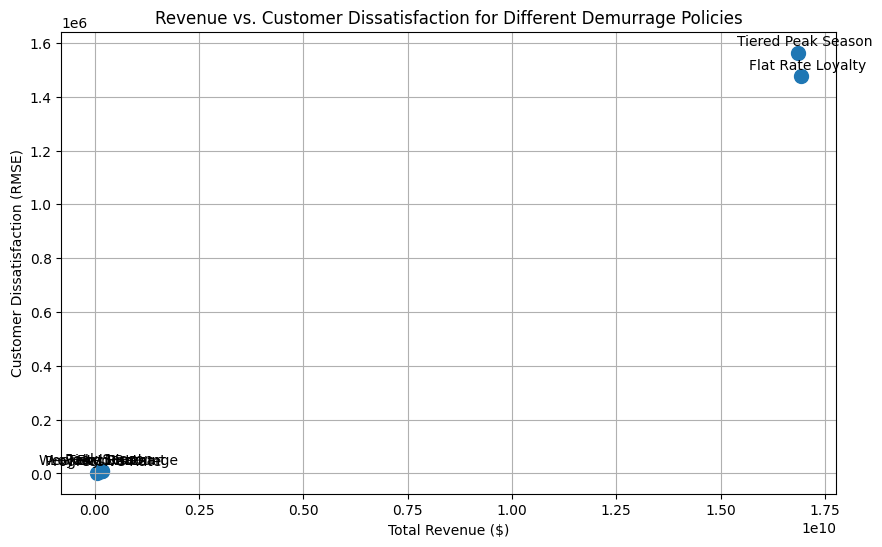

In [ ]:
import matplotlib.pyplot as plt

policies = ['Flat Rate', 'Tiered Rate', 'Progressive Rate', 'Peak Season',
            'Weekend Surcharge', 'Loyalty Discount', 'Tiered Peak Season', 'Flat Rate Loyalty']
revenues = [154828500.00, 134583425.00, 45856575.00, 163824300.00,
            163662660.00, 154828500.00, 16848848250.00, 16932268500.00]
dissatisfaction = [8907.18, 8110.90, 2518.90, 9875.88, 9415.54, 8907.18, 1563412.09, 1475544.30]

plt.figure(figsize=(10, 6))
plt.scatter(revenues, dissatisfaction, s=100)  # Scatter plot with larger markers
plt.xlabel('Total Revenue ($)')
plt.ylabel('Customer Dissatisfaction (RMSE)')
plt.title('Revenue vs. Customer Dissatisfaction for Different Demurrage Policies')

# Annotate each point with the policy name
for i, policy in enumerate(policies):
    plt.annotate(policy, (revenues[i], dissatisfaction[i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True)
plt.show()

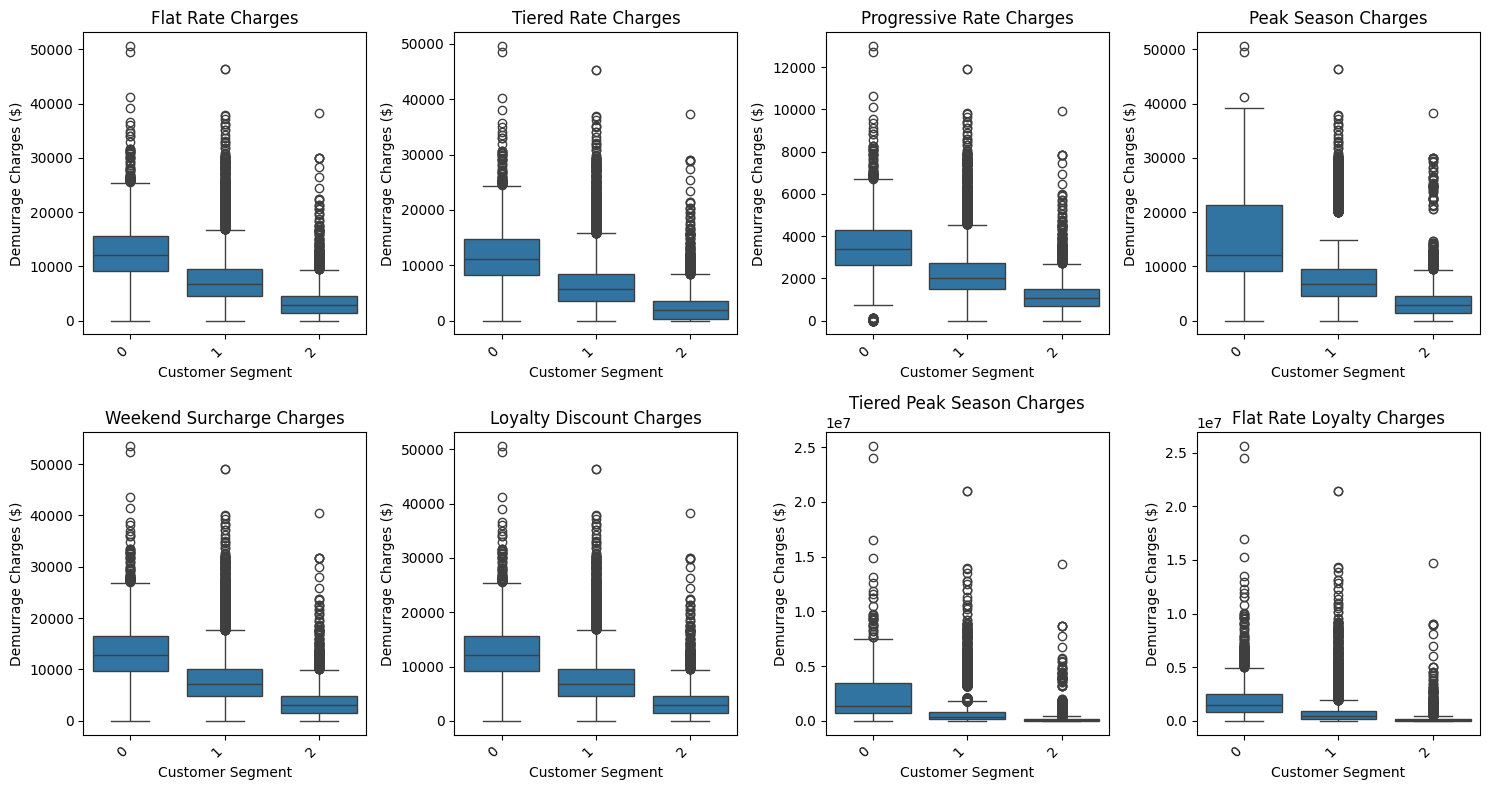

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 'customer_segment' column in your DataFrame

# List of policies to visualize
policies = ['flat_rate_charges', 'tiered_rate_charges', 'progressive_rate_charges',
            'peak_season_charges', 'weekend_surcharge_charges',
            'loyalty_discount_charges', 'tiered_peak_season_charges',
            'flat_rate_loyalty_charges']

plt.figure(figsize=(15, 8))

for i, policy in enumerate(policies):
    plt.subplot(2, 4, i+1)  # Create subplots in a 2x4 grid
    sns.boxplot(x='customer_segment', y=policy, data=df)
    plt.title(policy.replace('_', ' ').title())
    plt.xlabel('Customer Segment')
    plt.ylabel('Demurrage Charges ($)')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Interpreting the Box Plots and Their Relevance to Your Thesis

Here's an interpretation of the provided box plots and how they can strengthen your thesis:

**General Observations:**

* **Outliers:** Most policies exhibit outliers (points beyond the "whiskers" of the box plots), indicating some customers incur significantly higher demurrage charges than others within the same segment. This highlights the potential for revenue generation from customers who hold containers for extended periods.

* **Varying Distributions:**  The spread and median (central line within the box) of demurrage charges differ across customer segments and policies, suggesting that some policies might be more effective at targeting specific customer behaviors.

**Specific Policy Analysis:**

* **Flat Rate, Tiered Rate, Loyalty Discount:**  These policies show relatively similar distributions across segments, with the median charges slightly higher for Segment 2. This implies that these policies might not be effectively differentiating between customer segments based on their demurrage behavior.

* **Progressive Rate:** This policy has the lowest median charges overall, with a noticeable difference between Segment 0 (lowest) and Segment 2 (highest). This suggests that a progressive rate structure could incentivize shorter demurrage times, particularly for customers prone to longer holding periods.

* **Peak Season, Weekend Surcharge:** These policies generally show higher charges overall, as expected. The impact on different segments appears relatively consistent, indicating that these policies might primarily affect overall revenue rather than significantly influencing individual customer behavior.

* **Tiered Peak Season, Flat Rate Loyalty:** These combined policies exhibit extreme outliers and significantly higher charges, particularly for Segment 1.  This suggests that while potentially lucrative, these policies might need careful consideration regarding customer acceptance and potential pushback due to high charges.

**Relating to Your Thesis:**

1. **Supporting Your Choice of Demurrage Policy Optimization:** The box plots provide visual evidence that different policies lead to varying revenue distributions across customer segments. This underscores the importance of your thesis topic, demonstrating the need for optimization to find the most effective policy.

2. **Analyzing Fairness and Customer Impact:** The varying impact on different segments raises questions about fairness and potential customer churn. You can discuss whether it's desirable to have policies that impact all segments equally or if targeted approaches are preferable.

3. **Highlighting the Trade-off between Revenue and Customer Satisfaction:** Policies with higher overall charges (like Tiered Peak Season) might generate more revenue but could also lead to increased customer dissatisfaction.  You can link this back to your RMSE analysis and discuss the importance of finding a balance.

4. **Recommending Customer Segmentation and Targeted Policies:** The box plots suggest that segmenting customers based on demurrage behavior and applying tailored policies (e.g., potentially a progressive rate for Segment 2) could be more effective than one-size-fits-all approaches.

**Further Analysis:**

* **Statistical Tests:** Conduct statistical tests (e.g., ANOVA) to determine if the differences in mean or median charges between segments for each policy are statistically significant.

* **Qualitative Research:**  Complement your quantitative findings with qualitative research (if possible) to understand customer perceptions of different demurrage policies and their willingness to pay.

By thoroughly analyzing and discussing these box plots in your dissertation, you can provide valuable insights into how different demurrage policies impact various customer segments. This will strengthen your arguments for policy optimization and support your recommendations for Suttons Group.


In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
!git clone https://github.com/fdpages/Demurrage-MLModel_Suttons.git


Cloning into 'Demurrage-MLModel_Suttons'...


In [4]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set your base directory in Google Drive
base_dir = '/content/drive/MyDrive/'

# Recursively list files to find the notebook
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.ipynb'):
            print(os.path.join(root, file))


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/ML Project Timeline.ipynb
/content/drive/MyDrive/Colab Notebooks/Demand Prediction (Suttons) v0.1 .ipynb
/content/drive/MyDrive/Colab Notebooks/Revision_cost_prediction.ipynb
/content/drive/MyDrive/Colab Notebooks/OPTIMISING TANK CONTAINER INVENTORY MANAGEMENT UNDER DEMURRAGE UNCERTAINTY - USING MACHINE LEARNING FOR TC AVAILABILITY PREDICTION 3.ipynb
/content/drive/MyDrive/Colab Notebooks/updated_FIVERRprediction_cost.ipynb
/content/drive/MyDrive/Colab Notebooks/AlphaFold2.ipynb
/content/drive/MyDrive/Colab Notebooks/MAINML Model On Demurrage.ipynb
/content/drive/MyDrive/Google AI Studio/RAG_Omdena.ipynb
